# LAB 10

### Try CNN on "Fruit" dataset. Also modify number of layers and observe the performance difference:

### https://www.kaggle.com/moltean/fruits

### Or (In a case if you don't have that much dataPack available, download 20 images of apple and 20 images of orange from the internet and work on it with RANDOM state=Rollnumber stratergy, 80-20% training-testing division)

In [2]:
# Import libraries
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
from torch.autograd import Variable
from torch.utils.data import DataLoader
from sklearn.datasets import load_files
from sklearn.model_selection import train_test_split

In [3]:
# Load Data Directory
data_dir = '/home/nihar/Desktop/SEM 7/ML/Lab/Lab9/sample-fruits-360'

In [4]:
# Function for load images
def load_dataset(path):
    data = load_files(path)
    files = np.array(data['filenames'])
    targets = np.array(data['target'])
    target_labels = np.array(data['target_names'])
    return files, targets, target_labels

In [5]:
# Load Dataset
x, y, target_labels = load_dataset(data_dir)
print("Dataset Loaded !")

# Get Trainning size and Test size 
print('Total set size : ',x.shape)
print('Total targets : ',len(target_labels) )

Dataset Loaded !
Total set size :  (975,)
Total targets :  65


In [6]:
# Function for convert image to array
def convert_image_to_array(files):
    images_as_array=[]
    for file in files:
        images_as_array.append(keras.preprocessing.image.img_to_array(keras.preprocessing.image.load_img(file)))
    return images_as_array

# Convert images to numpy array using keras.preprocessing library
x = np.array(convert_image_to_array(x),np.float32)
print(x.shape)

(975, 100, 100, 3)


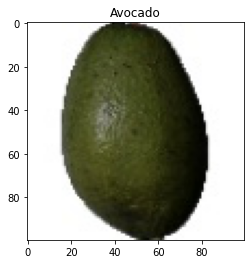

In [7]:
# Plot image on random data
plt.imshow(x[1]/255)
plt.title(target_labels[y[1]])
plt.show()

In [8]:
# Flatten the features of image
x = x.reshape([-1,100*100*3])
x = x/255
print("final shape : " , x.shape)

final shape :  (975, 30000)


In [9]:
# Train and Test split
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=130)

# Get size of all set
print("X Train size : ", X_train.shape)
print("X Test size : ", X_test.shape)
print("Y Train size : ", y_train.shape)
print("Y Test size : ", y_test.shape)

X Train size :  (780, 30000)
X Test size :  (195, 30000)
Y Train size :  (780,)
Y Test size :  (195,)


In [10]:
# Convert numpy array to torch
X_train = torch.from_numpy(X_train)
y_train = torch.from_numpy(y_train).type(torch.LongTensor)
X_test = torch.from_numpy(X_test)
y_test = torch.from_numpy(y_test).type(torch.LongTensor)

In [11]:
# Define no of iteration, batch size, num_epochs
batch_size=100
n_iters = 1000
num_epochs = n_iters / (len(X_train) / batch_size)
num_epochs = int(num_epochs)

In [12]:
# Set train and test
train = torch.utils.data.TensorDataset(X_train,y_train)
test = torch.utils.data.TensorDataset(X_test,y_test)
train_loader = DataLoader(train, batch_size = batch_size, shuffle = False)
test_loader = DataLoader(test, batch_size = batch_size, shuffle = False)

### CNN with 2 convolutional layer and 1 fully connected layer

In [13]:
# Create CNN Model
class CNNModel(nn.Module):
    def __init__(self):
        super(CNNModel, self).__init__()
        
        self.cnn1 = nn.Conv2d(in_channels=3,out_channels=16,kernel_size=5,stride=1,padding=0)
        self.relu1 = nn.ReLU()

        self.maxpool1 = nn.MaxPool2d(kernel_size=2)

        self.cnn2 = nn.Conv2d(in_channels=16,out_channels=32,kernel_size=5,stride=1,padding=0)
        self.relu2 = nn.ReLU()

        self.maxpool2 = nn.MaxPool2d(kernel_size=2)
        
        self.fc1 = nn.Linear(15488,len(target_labels));
        
    def forward(self,x):
        
        out=self.cnn1(x)
        out=self.relu1(out)
        out=self.maxpool1(out)
    
        out=self.cnn2(out)
        out=self.relu2(out)
        out=self.maxpool2(out)
        
        out = out.view(out.size(0), -1)
        out=self.fc1(out)
        
        return out

In [14]:
# Initialize Parameters and fit the model
model = CNNModel()
error = nn.CrossEntropyLoss()
learning_rate = 0.1
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [15]:
# CNN model training
count = 0
loss_list = []
iteration_list = []
accuracy_list = []
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        train = Variable(images.view(-1,3,100,100))
        #print(train.shape)
        labels = Variable(labels)
        optimizer.zero_grad()
        outputs = model(train)
        loss = error(outputs, labels)
        loss.backward()      
        optimizer.step()      
        count += 1
        
        if count % 50 == 0:         
            correct = 0
            total = 0
            for images, labels in test_loader:
                test = Variable(images.view(-1,3,100,100))
                outputs = model(test)
                predicted = torch.max(outputs.data, 1)[1]
                total += len(labels)
                correct += (predicted == labels).sum()
            accuracy = 100 * correct / float(total)
            loss_list.append(loss.data)
            iteration_list.append(count)
            accuracy_list.append(accuracy)
            if count % 5 == 0:
                print('Iteration: {}  Loss: {}  Accuracy: {} %'.format(count, loss.data, accuracy))

Iteration: 50  Loss: 4.177640914916992  Accuracy: 0.5128205418586731 %
Iteration: 100  Loss: 4.171385288238525  Accuracy: 0.5128205418586731 %
Iteration: 150  Loss: 4.173364639282227  Accuracy: 0.5128205418586731 %
Iteration: 200  Loss: 4.165744781494141  Accuracy: 0.5128205418586731 %
Iteration: 250  Loss: 4.174900054931641  Accuracy: 0.5128205418586731 %
Iteration: 300  Loss: 4.170322418212891  Accuracy: 0.5128205418586731 %
Iteration: 350  Loss: 4.173282623291016  Accuracy: 0.5128205418586731 %
Iteration: 400  Loss: 4.152068138122559  Accuracy: 1.5384615659713745 %
Iteration: 450  Loss: 4.176961421966553  Accuracy: 0.5128205418586731 %
Iteration: 500  Loss: 4.166104793548584  Accuracy: 0.5128205418586731 %
Iteration: 550  Loss: 4.17341947555542  Accuracy: 0.5128205418586731 %
Iteration: 600  Loss: 4.152791500091553  Accuracy: 0.5128205418586731 %
Iteration: 650  Loss: 4.181325912475586  Accuracy: 0.5128205418586731 %
Iteration: 700  Loss: 4.1674113273620605  Accuracy: 0.512820541858

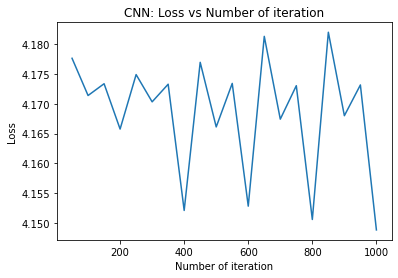

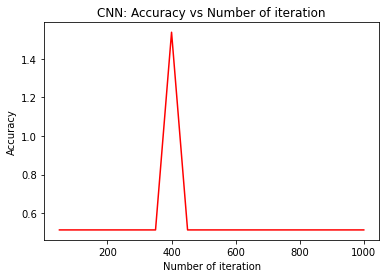

In [16]:
# visualization loss 
plt.plot(iteration_list,loss_list)
plt.xlabel("Number of iteration")
plt.ylabel("Loss")
plt.title("CNN: Loss vs Number of iteration")
plt.show()

# visualization accuracy 
plt.plot(iteration_list,accuracy_list,color = "red")
plt.xlabel("Number of iteration")
plt.ylabel("Accuracy")
plt.title("CNN: Accuracy vs Number of iteration")
plt.show()

### CNN with 3 convolutional layer and 1 fully connected

In [17]:
# Create CNN Model
class CNNModel(nn.Module):
    def __init__(self):
        super(CNNModel, self).__init__()
        
        self.cnn1 = nn.Conv2d(in_channels=3,out_channels=16,kernel_size=5,stride=1,padding=0)
        self.relu1 = nn.ReLU()

        self.maxpool1 = nn.MaxPool2d(kernel_size=2)

        self.cnn2 = nn.Conv2d(in_channels=16,out_channels=32,kernel_size=5,stride=1,padding=0)
        self.relu2 = nn.ReLU()

        self.maxpool2 = nn.MaxPool2d(kernel_size=2)
        
        self.cnn3 = nn.Conv2d(in_channels=32,out_channels=64,kernel_size=5,stride=1,padding=0)
        self.relu3 = nn.ReLU()

        self.maxpool3 = nn.MaxPool2d(kernel_size=2)
         
        self.fc1 = nn.Linear(5184,len(target_labels));
        
    def forward(self,x):
        
        out=self.cnn1(x)
        out=self.relu1(out)
        out=self.maxpool1(out)
    
        out=self.cnn2(out)
        out=self.relu2(out)
        out=self.maxpool2(out)
        
        out=self.cnn3(out)
        out=self.relu3(out)
        out=self.maxpool3(out)
        
        out = out.view(out.size(0), -1)
        out = self.fc1(out)
        
        return out

In [18]:
# Initialize Parameters and fit the model
model = CNNModel()
error = nn.CrossEntropyLoss()
learning_rate = 0.02
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [19]:
# CNN model training
count = 0
loss_list = []
iteration_list = []
accuracy_list = []
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        train = Variable(images.view(-1,3,100,100))
        labels = Variable(labels)
        optimizer.zero_grad()
        outputs = model(train)
        loss = error(outputs, labels)
        loss.backward()      
        optimizer.step()      
        count += 1
        
        if count % 50 == 0:         
            correct = 0
            total = 0
            for images, labels in test_loader:
                test = Variable(images.view(-1,3,100,100))
                outputs = model(test)
                predicted = torch.max(outputs.data, 1)[1]
                total += len(labels)
                correct += (predicted == labels).sum()
            accuracy = 100 * correct / float(total)
            loss_list.append(loss.data)
            iteration_list.append(count)
            accuracy_list.append(accuracy)
            if count % 5 == 0:
                print('Iteration: {}  Loss: {}  Accuracy: {} %'.format(count, loss.data, accuracy))

Iteration: 50  Loss: 4.158178806304932  Accuracy: 1.0256410837173462 %
Iteration: 100  Loss: 4.065518856048584  Accuracy: 1.5384615659713745 %
Iteration: 150  Loss: 3.2244081497192383  Accuracy: 31.794872283935547 %
Iteration: 200  Loss: 3.3317341804504395  Accuracy: 26.153846740722656 %
Iteration: 250  Loss: 1.5527348518371582  Accuracy: 61.02564239501953 %
Iteration: 300  Loss: 0.27039891481399536  Accuracy: 95.8974380493164 %
Iteration: 350  Loss: 0.11770854890346527  Accuracy: 98.46154022216797 %
Iteration: 400  Loss: 0.03127047419548035  Accuracy: 98.46154022216797 %
Iteration: 450  Loss: 0.08717073500156403  Accuracy: 98.46154022216797 %
Iteration: 500  Loss: 0.05519659444689751  Accuracy: 98.46154022216797 %
Iteration: 550  Loss: 0.08663738518953323  Accuracy: 98.97435760498047 %
Iteration: 600  Loss: 0.02194184437394142  Accuracy: 98.97435760498047 %
Iteration: 650  Loss: 0.053640518337488174  Accuracy: 98.46154022216797 %
Iteration: 700  Loss: 0.007185386493802071  Accuracy: 9

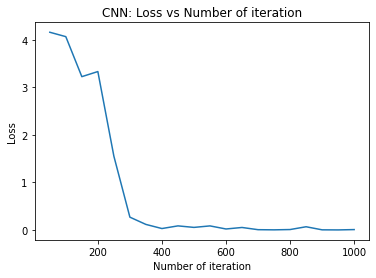

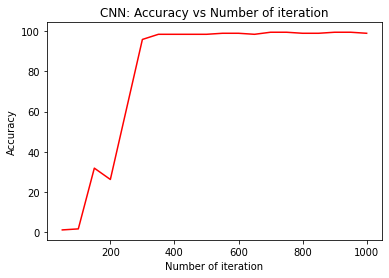

In [20]:
# visualization loss 
plt.plot(iteration_list,loss_list)
plt.xlabel("Number of iteration")
plt.ylabel("Loss")
plt.title("CNN: Loss vs Number of iteration")
plt.show()

# visualization accuracy 
plt.plot(iteration_list,accuracy_list,color = "red")
plt.xlabel("Number of iteration")
plt.ylabel("Accuracy")
plt.title("CNN: Accuracy vs Number of iteration")
plt.show()

#### As we can see from above two model , if first I take 2 convolutional layer and 1 full connected layer with learning rate 0.1, next I take 3 convolutional layer and 1 fully connected layer with learning rate 0.02, keeping all parameters same I get good performance but If I take other learning rate with different numbers of convolutinal layer and fully connected layer then I get bad performance or underfitting model.